<a href="https://colab.research.google.com/github/Shalinda99/LoanApprovalPrediction/blob/main/204200A_ML_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**204200A-ML_Assignmnet**,
Loan Approval Prediction...
*Note*:If a Company wants to automate the loan eligibility process (real time) based on customer detail ,they can use this.

In [ ]:
#204200A ML Assignment Automated Loan Approval Prediction
# importing the neccessary packages.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
from google.colab import files
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, f1_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# Upload the file
uploaded = files.upload()


# Load the dataset
data = pd.read_csv('204200A_LoanApprovalPrediction_dataset.csv')
data
print("Dataset Overview:")
print(data.head())

Saving 204200A_LoanApprovalPrediction_dataset.csv to 204200A_LoanApprovalPrediction_dataset (2).csv
Dataset Overview:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Sta

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
# checking for null values
data.isna().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Replace 'Y' and 'N' in the 'Loan_Status' column with 1 and 0
data['Loan_Status'] = data['Loan_Status'].replace({'Y': 1, 'N': 0})


Note: because the Data type of Loan_Status is object so I will replace Loan_Status (Y/N) into (0,1) to show that independent column is effect on dependent column or not.

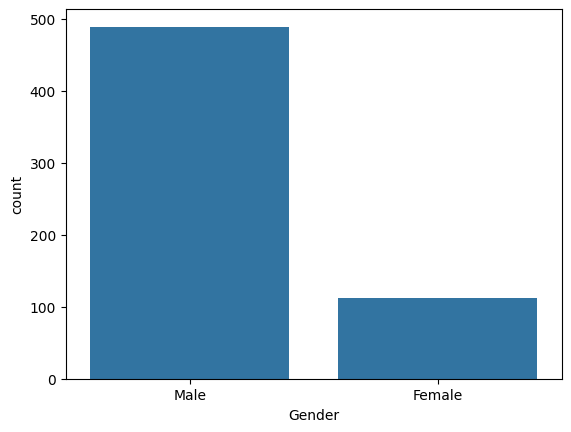

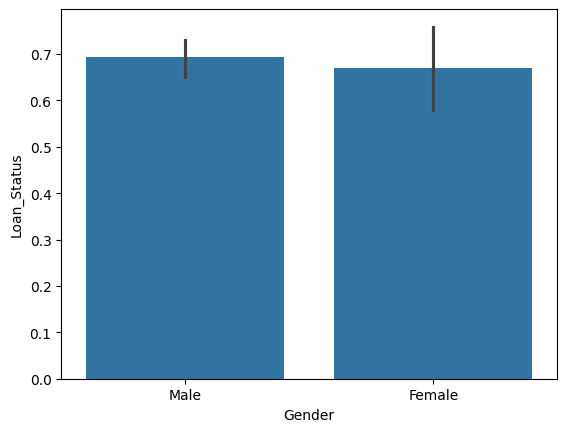

,count
Gender,
Male,489
Female,112


In [ ]:
#independent column Gender
#Male/ Female
sns.countplot(data=data,x='Gender')
plt.show()

# to show that Gender column is effect on Loan_Status or not
sns.barplot(data=data,x='Gender',y='Loan_Status')
plt.show()
data['Gender'].value_counts()

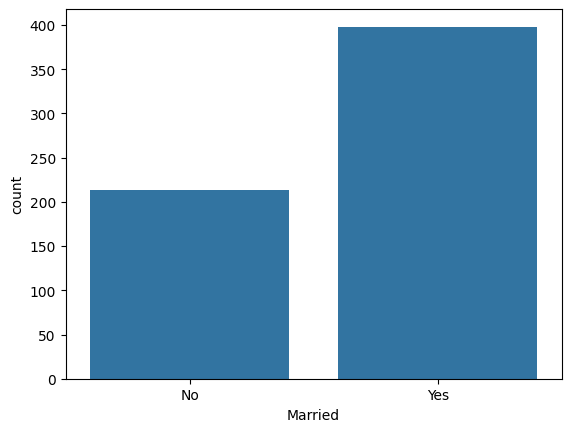

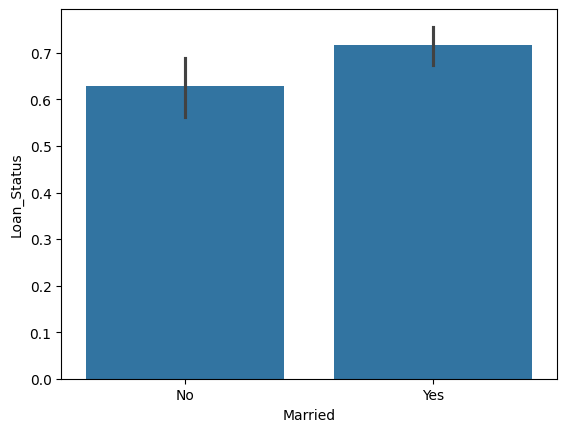

,count
Married,
Yes,398
No,213


In [ ]:
#independent column Married
#Applicant married (Y/N)
sns.countplot(data=data,x='Married')
plt.show()

# to show that Married column is effect on Loan_Status or not
sns.barplot(data=data,x='Married',y='Loan_Status')
plt.show()
data['Married'].value_counts()

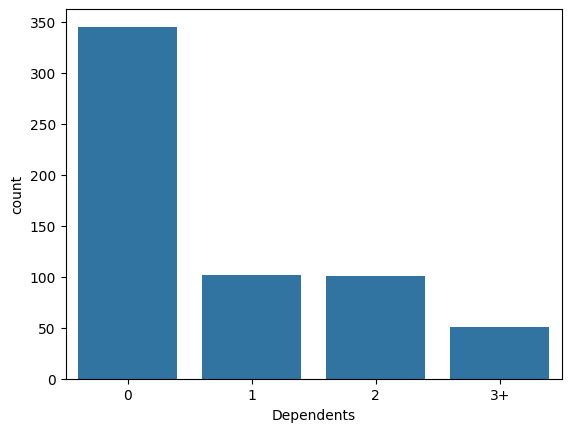

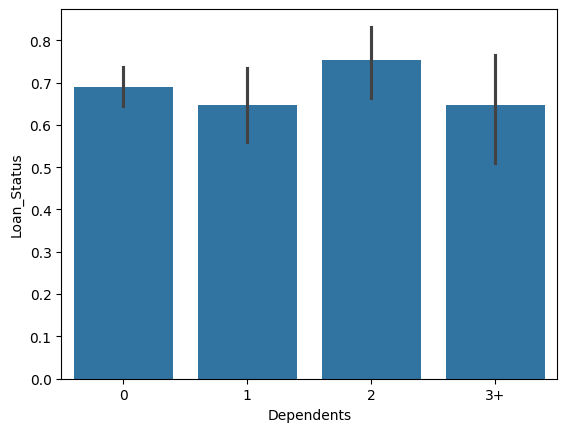

,count
Dependents,
0,345
1,102
2,101
3+,51


In [ ]:
#independent column Dependents
#Number of dependents
sns.countplot(data=data,x='Dependents')
plt.show()

# to show that dependents column is effect on Loan_Status or not
sns.barplot(data=data,x='Dependents',y='Loan_Status')
plt.show()
data['Dependents'].value_counts()

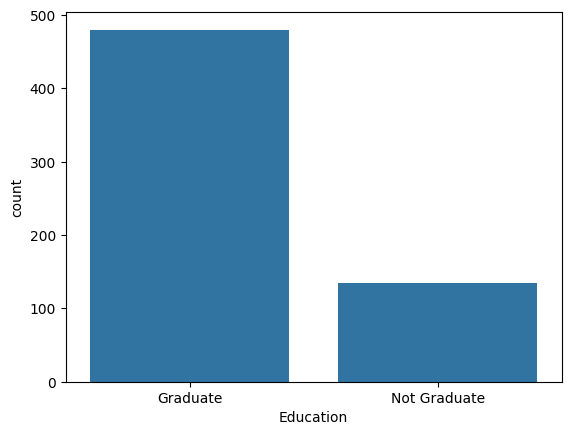

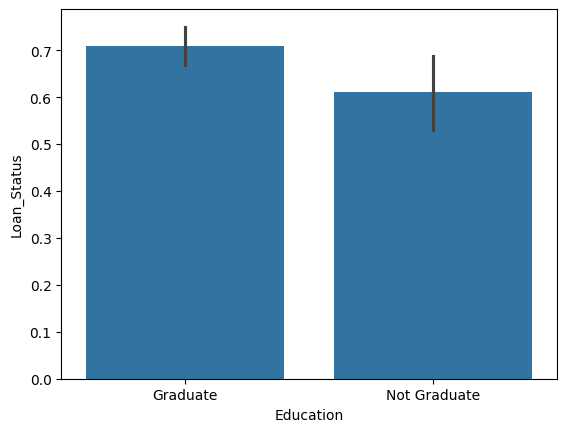

,count
Education,
Graduate,480
Not Graduate,134


In [ ]:
#independent column Education
#Applicant Education (Graduate/ Under Graduate)
sns.countplot(data=data,x='Education')
plt.show()

# to show that Education column is effect on Loan_Status or not
sns.barplot(data=data,x='Education',y='Loan_Status')
plt.show()
data['Education'].value_counts()

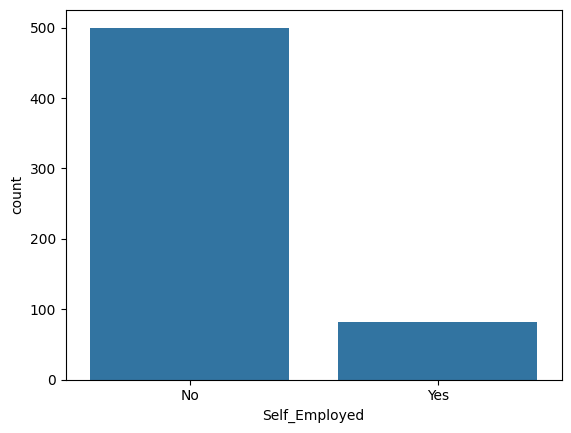

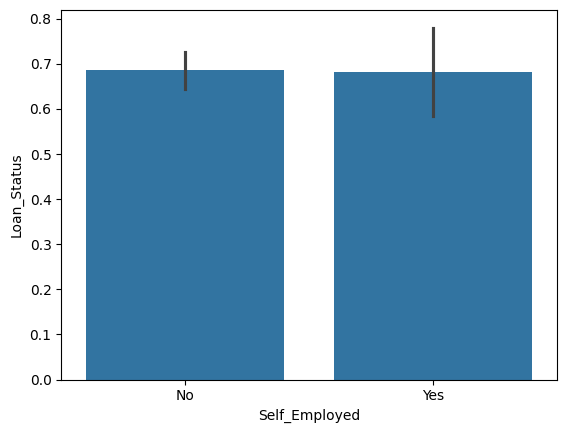

,count
Self_Employed,
No,500
Yes,82


In [ ]:
#independent column Self_Employed
#Self-employed (Y/N)
sns.countplot(data=data,x='Self_Employed')
plt.show()

# to show that Self_Employed column is effect on Loan_Status or not
sns.barplot(data=data,x='Self_Employed',y='Loan_Status')
plt.show()
data['Self_Employed'].value_counts()

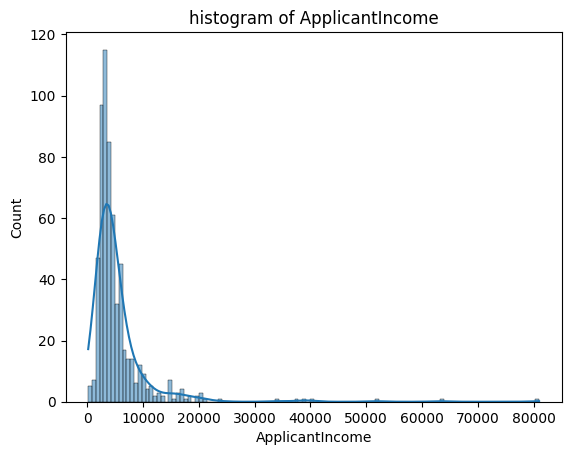

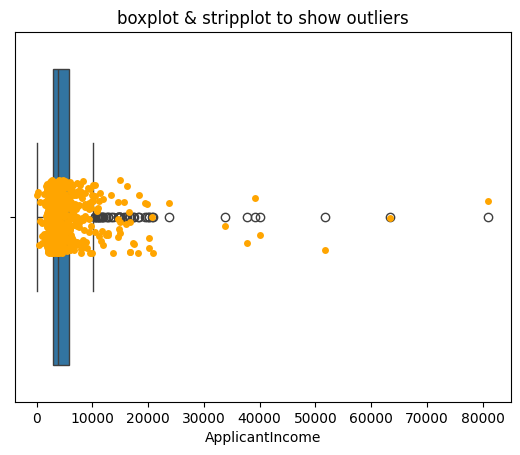

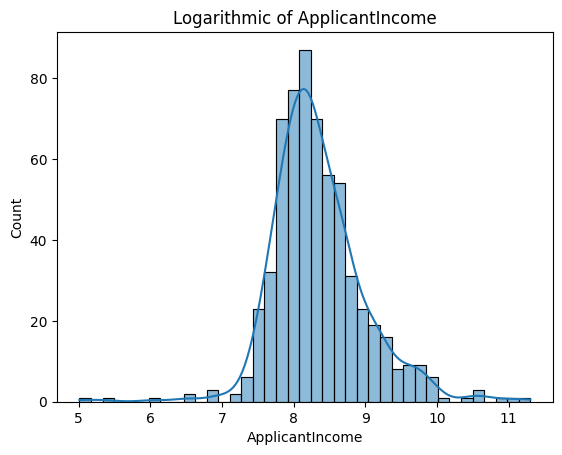

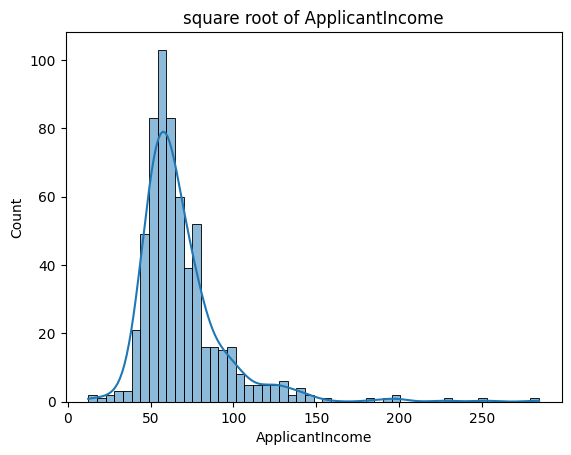

In [ ]:
#indepedent column ApplicantIncome
sns.histplot(data=data,x='ApplicantIncome',kde=True)
plt.title("histogram of ApplicantIncome" )
plt.show()

#have outlier in ApplicantIncome
sns.boxplot(x='ApplicantIncome', data=data)
sns.stripplot(x='ApplicantIncome', data=data, color="orange")
plt.title("boxplot & stripplot to show outliers" )
plt.show()

#Logarithmic to normalize the distribution and reduce the impact of outliers
sns.histplot(np.log(data['ApplicantIncome']),kde=True)
plt.title("Logarithmic of ApplicantIncome" )
plt.show()

# square root to normalize the distribution
sns.histplot(np.sqrt(data['ApplicantIncome']),kde=True)
plt.title("square root of ApplicantIncome" )
plt.show()

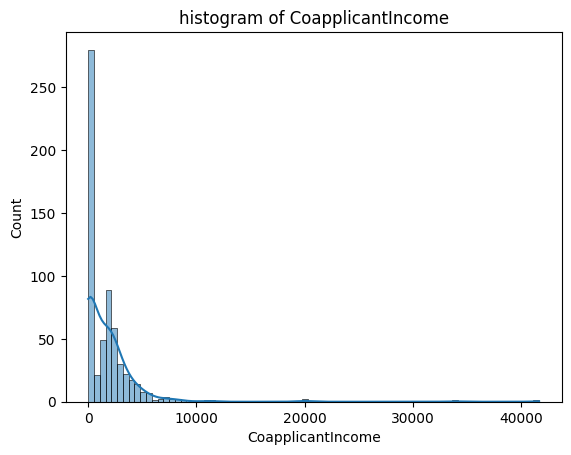

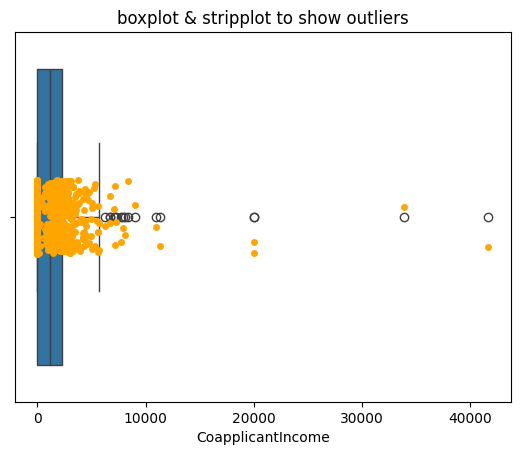

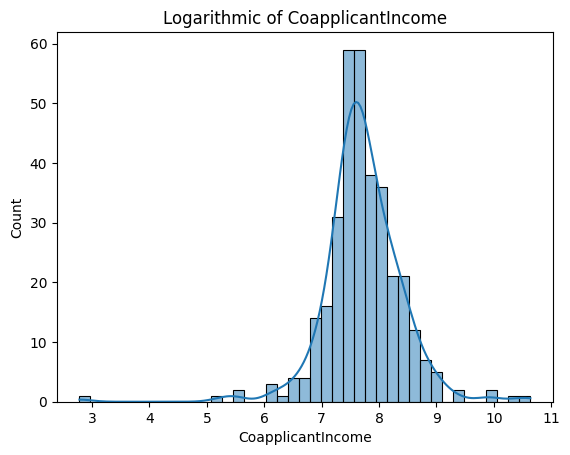

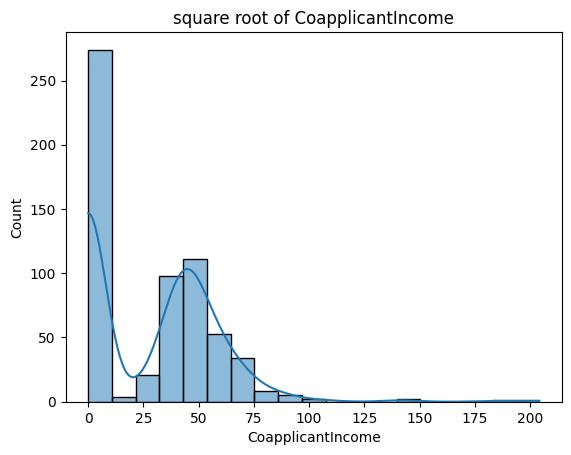

,count
CoapplicantIncome,
0.0,273


In [ ]:
#indepedent column CoapplicantIncome
#Coapplicant income

sns.histplot(data=data,x='CoapplicantIncome',kde=True)
plt.title("histogram of CoapplicantIncome" )
plt.show()

#note have outlier in CoapplicantIncome
sns.boxplot(x='CoapplicantIncome', data=data)
sns.stripplot(x='CoapplicantIncome', data=data, color="orange")
plt.title("boxplot & stripplot to show outliers" )
plt.show()

#Logarithmic to normalize the distribution and reduce the impact of outliers
sns.histplot(np.log(data['CoapplicantIncome']),kde=True)
plt.title("Logarithmic of CoapplicantIncome" )
plt.show()

# square root to normalize the distribution
sns.histplot(np.sqrt(data['CoapplicantIncome']),kde=True)
plt.title("square root of CoapplicantIncome" )
plt.show()

data['CoapplicantIncome'].value_counts()[0:0]

I will rename the sum of ApplicantIncome and CoapplicantIncome to TotalIncome at feature engineering step and need to visualize the sum of ApplicantIncome and CoapplicantIncome and I will do it because these columns have a relevant information from the raw data and transforming it into a feature that can be used in the machine learning model and the CoapplicantIncome not following the normal distribution.


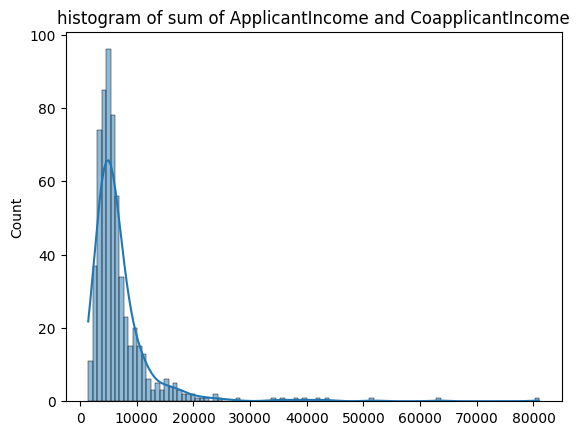

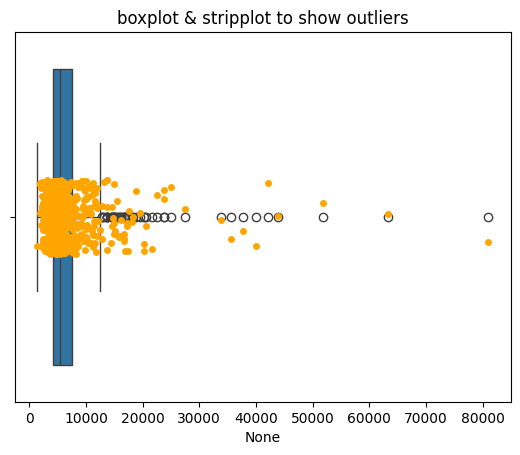

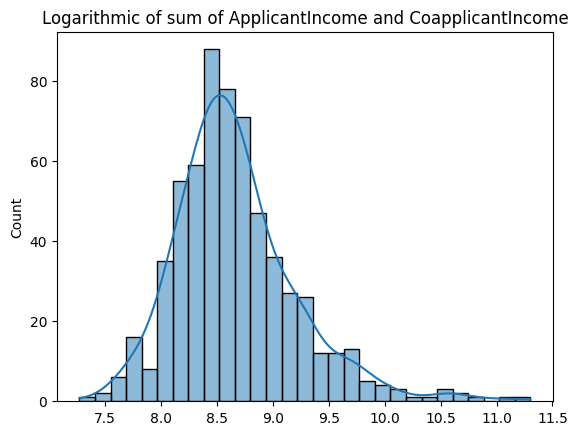

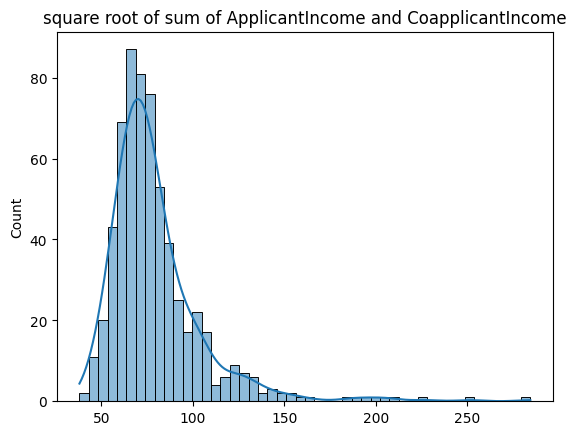

In [ ]:
#ApplicantIncome + CoapplicantIncome

sns.histplot(data['ApplicantIncome']+data['CoapplicantIncome'],kde=True)
plt.title("histogram of sum of ApplicantIncome and CoapplicantIncome" )
plt.show()

# Note have outlier in sum of ApplicantIncome & CoapplicantIncome
sns.boxplot(x=data['ApplicantIncome']+data['CoapplicantIncome'])
sns.stripplot(x=data['ApplicantIncome']+data['CoapplicantIncome'], color="orange")
plt.title("boxplot & stripplot to show outliers" )
plt.show()

#Logarithmic to normalize the distribution and reduce the impact of outliers
sns.histplot(np.log(data['ApplicantIncome']+data['CoapplicantIncome']),kde=True)
plt.title("Logarithmic of sum of ApplicantIncome and CoapplicantIncome" )
plt.show()

# square root to normalize the distribution
sns.histplot(np.sqrt(data['ApplicantIncome']+data['CoapplicantIncome']),kde=True)
plt.title("square root of sum of ApplicantIncome and CoapplicantIncome" )
plt.show()

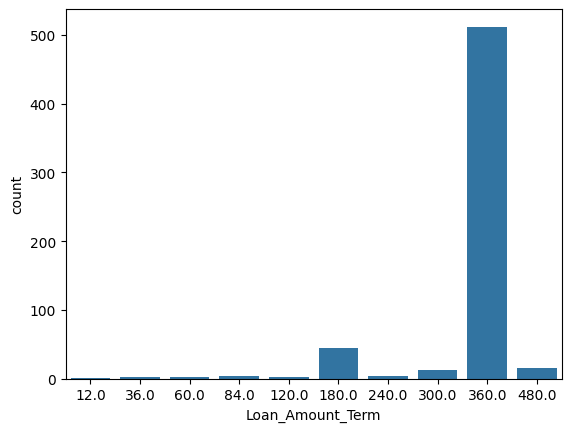

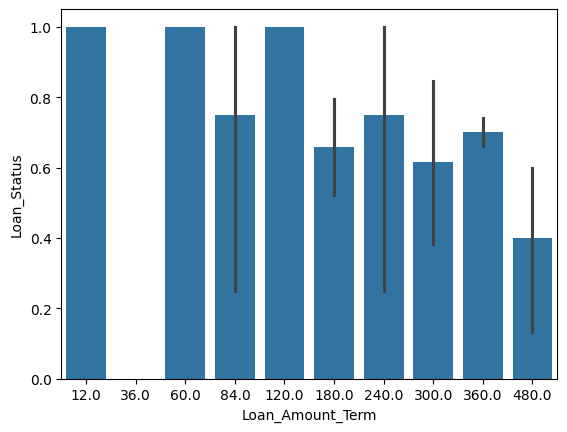

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


In [ ]:
#independent column Loan amount term
#Self-employed (Y/N)
sns.countplot(data=data,x='Loan_Amount_Term')
plt.show()

# to show that Self_Employed column is effect on amount term or not
sns.barplot(data=data,x='Loan_Amount_Term',y='Loan_Status')
plt.show()
data['Loan_Amount_Term'].value_counts()

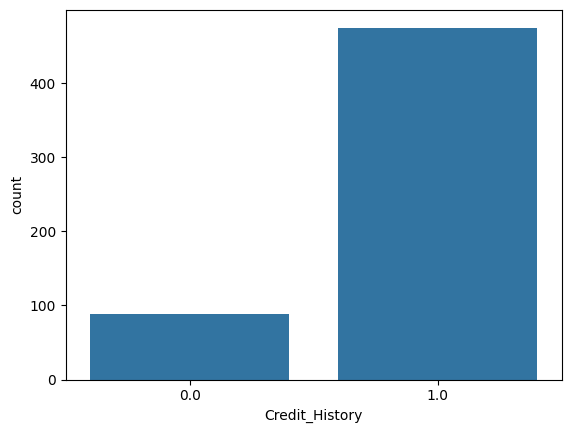

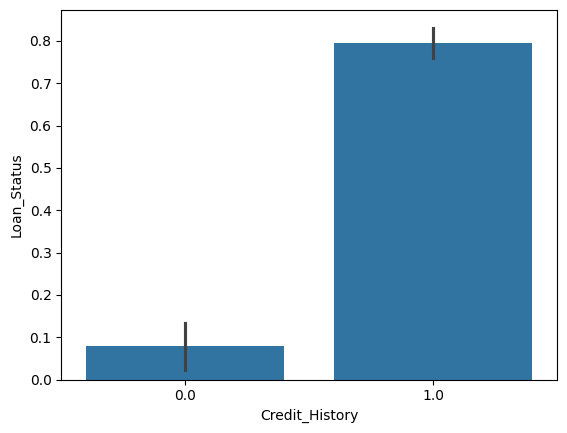

,count
Credit_History,
1.0,475
0.0,89


In [ ]:
#independent column Credit_History
#credit history meets guidelines
sns.countplot(data=data,x='Credit_History')
plt.show()

# to show that Credit_History column is effect on Loan_Status or not
sns.barplot(data=data,x='Credit_History',y='Loan_Status')
plt.show()

#count the values of columns
data['Credit_History'].value_counts()

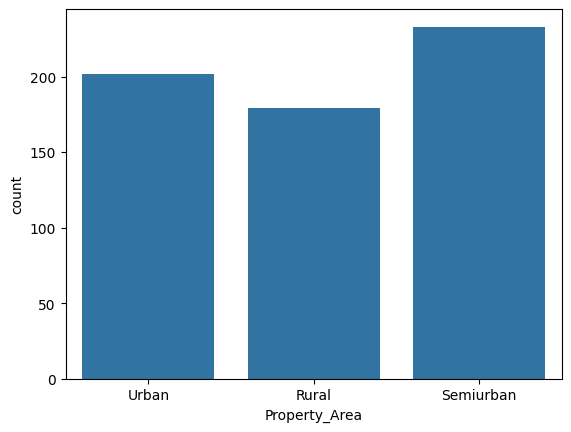

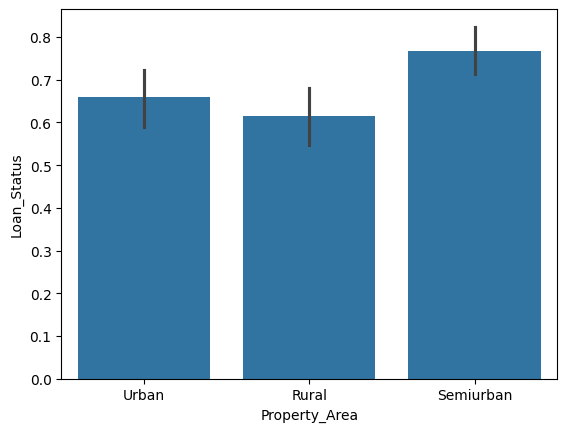

,count
Property_Area,
Semiurban,233
Urban,202
Rural,179


In [ ]:
#independent column Property_Area
#Urban/ Semi-Urban/ Rural
sns.countplot(data=data,x='Property_Area')
plt.show()

# to show that Property_Area column is effect on Loan_Status or not
sns.barplot(data=data,x='Property_Area',y='Loan_Status')
plt.show()

#count the values of columns
data['Property_Area'].value_counts()

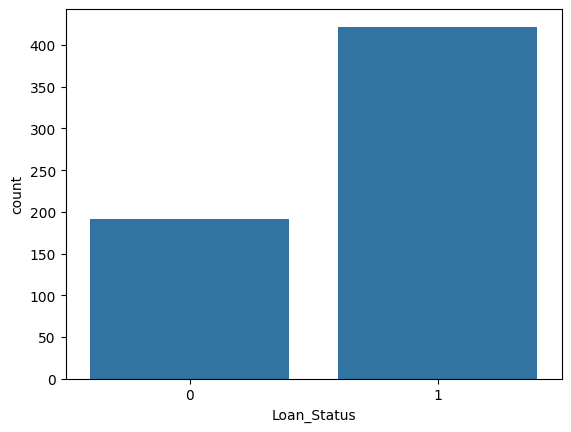

,count
Loan_Status,
1,422
0,192


In [ ]:
#depebdent column Loan_Status
#Loan approved (0/1)
sns.countplot(data=data,x='Loan_Status')
plt.show()

#count the values of columns
data['Loan_Status'].value_counts()

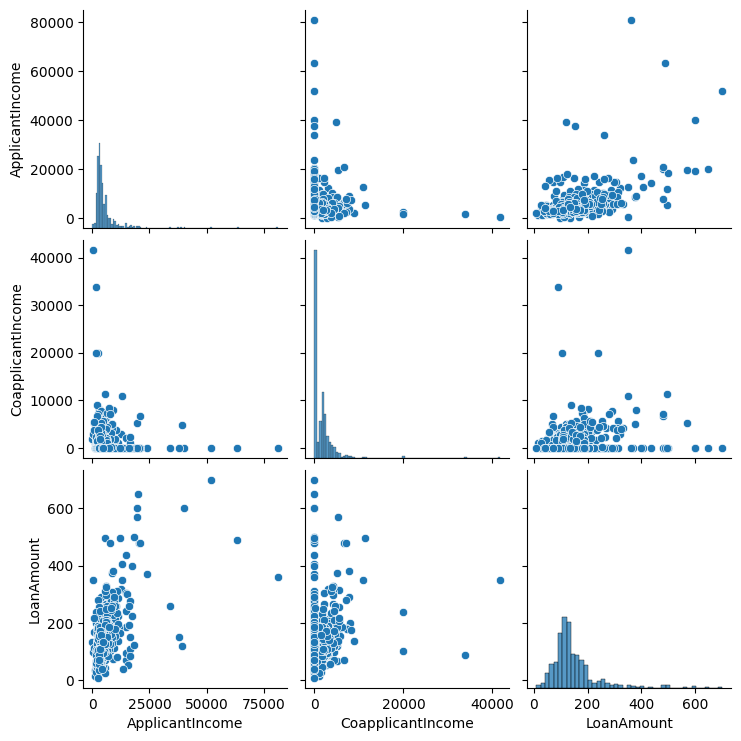

In [ ]:
# discover the relationship between all quantitave features
pair =data[['ApplicantIncome','CoapplicantIncome', 'LoanAmount']]
sns.pairplot(data=pair)
plt.show()

**Split data set**

I  split data set into train set and test set

In [ ]:
X = data.drop('Loan_Status',axis=1)
y= data[['Loan_Status']]

In [ ]:
from sklearn.model_selection import train_test_split
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size= 0.1, random_state= 0)

In [ ]:
print('length of Train',len(X_Train))
print('length of Test',len(X_Test))

length of Train 552
length of Test 62


**Data preprocessing**

First I Preprocess the train data set

In [ ]:
data_train=pd.concat([X_Train,y_Train],axis=1)
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
406,LP002308,Male,Yes,0,Not Graduate,No,2167,2400.0,115.0,360.0,1.0,Urban,1
17,LP001036,Female,No,0,Graduate,No,3510,0.0,76.0,360.0,0.0,Urban,0
427,LP002368,Male,Yes,2,Graduate,No,5935,0.0,133.0,360.0,1.0,Semiurban,1
21,LP001046,Male,Yes,1,Graduate,No,5955,5625.0,315.0,360.0,1.0,Urban,1
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,1


In [ ]:
# drop Loan_ID column because it's unique and it's not effiecent in models
data_train.drop(['Loan_ID'],axis=1,inplace=True)

I write a function for reusable purpose

In [ ]:
def encoding(df):
    # convert Gender to 1, 0 (Male = 1, Female = 0)
    if 'Gender' in df.columns:
        df['Gender'] = df['Gender'].replace(to_replace=['Male', 'Female'], value=[1, 0])

    # convert Married to 1, 0 (Yes = 1, No = 0)
    if 'Married' in df.columns:
        df['Married'] = df['Married'].replace(to_replace=['Yes', 'No'], value=[1, 0])

    # convert Education to 1, 0 (Graduate = 1, Not Graduate = 0)
    if 'Education' in df.columns:
        df['Education'] = df['Education'].replace(to_replace=['Graduate', 'Not Graduate'], value=[1, 0])

    # convert Self_Employed to 1, 0 (Yes = 1, No = 0)
    if 'Self_Employed' in df.columns:
        df['Self_Employed'] = df['Self_Employed'].replace(to_replace=['Yes', 'No'], value=[1, 0])

    # convert Dependents column to integers
    if 'Dependents' in df.columns:
        df['Dependents'] = df['Dependents'].replace(to_replace=['0', '1', '2', '3+'], value=[0, 1, 2, 3])

    # encode Property_Area as binary columns
    if 'Property_Area' in df.columns:
        unique_values = df['Property_Area'].unique()
        for value in unique_values:
            df[f'Property_Area_{value}'] = (df['Property_Area'] == value).astype(int)
        df.drop('Property_Area', axis=1, inplace=True)  # remove the original column after encoding

    return df


In [ ]:
#apply function
data_train = encoding(data_train)
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Urban,Property_Area_Semiurban,Property_Area_Rural
406,1.0,1.0,0.0,0,0.0,2167,2400.0,115.0,360.0,1.0,1,1,0,0
17,0.0,0.0,0.0,1,0.0,3510,0.0,76.0,360.0,0.0,0,1,0,0
427,1.0,1.0,2.0,1,0.0,5935,0.0,133.0,360.0,1.0,1,0,1,0
21,1.0,1.0,1.0,1,0.0,5955,5625.0,315.0,360.0,1.0,1,1,0,0
460,NaN,1.0,0.0,1,1.0,2083,4083.0,160.0,360.0,NaN,1,0,1,0


Applying Feature Engineering

In [ ]:
# TotalIncome column will represent the two columns ApplicantIncome and CoapplicantIncome
data_train['TotalIncome']=data_train['ApplicantIncome']+data_train['CoapplicantIncome']

**Handling Outliers**

Note: I  apply Transforming technique.

I  use logarithm transformation on TotalIncome column.

I  use square root transformation on LoanAmount column.

In [ ]:
#logarithm transformation on TotalIncome column
data_train['Log_TotalIncome']=np.log(data_train['TotalIncome'])

#square root transformation on LoanAmount column
data_train['sqrt_LoanAmount']=np.sqrt(data_train['LoanAmount'])

In [ ]:
# drop these columns because i did a feature engineering of those
data_train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1,inplace=True)

In [ ]:
data_train.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Urban,Property_Area_Semiurban,Property_Area_Rural,Log_TotalIncome,sqrt_LoanAmount
406,1.0,1.0,0.0,0,0.0,360.0,1.0,1,1,0,0,8.426612,10.723805
17,0.0,0.0,0.0,1,0.0,360.0,0.0,0,1,0,0,8.163371,8.717798
427,1.0,1.0,2.0,1,0.0,360.0,1.0,1,0,1,0,8.688622,11.532563
21,1.0,1.0,1.0,1,0.0,360.0,1.0,1,1,0,0,9.357035,17.748239
460,NaN,1.0,0.0,1,1.0,360.0,NaN,1,0,1,0,8.726806,12.649111


Now I finished the preparation of train set then prepare the test set depend on the results of preparation of test set to prevent of the data leaking

preprocessing on Testset

In [ ]:
data_test=pd.concat([X_Test,y_Test],axis=1)

In [ ]:
# drop Loan_ID column because it's unique and it's not effiecent in models
data_test.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
#apply function to Label encoding and one-hot encoding
data_test = encoding(data_test)
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Property_Area_Rural
454,1,0,0,1,1.0,7085,0.0,84.0,360.0,1.0,1,1,0,0
52,0,0,0,1,0.0,4230,0.0,112.0,360.0,1.0,0,1,0,0
536,1,1,0,1,0.0,6133,3906.0,324.0,360.0,1.0,1,0,1,0
469,1,1,0,1,0.0,4333,2451.0,110.0,360.0,1.0,0,0,1,0
55,1,1,2,1,0.0,2708,1167.0,97.0,360.0,1.0,1,1,0,0


Label encoding is a process of converting categorical variables into numerical variables by assigning a unique integer value to each category.

One-hot encoding, on the other hand, is a process of converting categorical variables into binary vectors. Each category is represented by a vector of zeros and a single one, indicating the presence of that category, One-hot encoding is often used when the categorical variable has no natural ordering

Feature engineering

Feature engineering is the process of transforming raw data into features that can be used to improve the performance of machine learning algorithms.

In [ ]:
# TotalIncome column will represent the two columns ApplicantIncome and CoapplicantIncome.
data_test['TotalIncome']=data_test['ApplicantIncome']+data_test['CoapplicantIncome']

#logarithm transformation on TotalIncome column to handle outliers.
data_test['Log_TotalIncome']=np.log(data_test['TotalIncome'])

#square root transformation on LoanAmount column to handle outliers.
data_test['sqrt_LoanAmount']=np.sqrt(data_test['LoanAmount'])

In [ ]:
# drop these columns because i did a feature engineering of those
data_test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','TotalIncome'],axis=1,inplace=True)

In [ ]:
data_test.head()

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Property_Area_Semiurban,Property_Area_Urban,Property_Area_Rural,Log_TotalIncome,sqrt_LoanAmount
454,1,0,0,1,1.0,360.0,1.0,1,1,0,0,8.865735,9.165151
52,0,0,0,1,0.0,360.0,1.0,0,1,0,0,8.349957,10.583005
536,1,1,0,1,0.0,360.0,1.0,1,0,1,0,9.214233,18.000000
469,1,1,0,1,0.0,360.0,1.0,0,0,1,0,8.822322,10.488088
55,1,1,2,1,0.0,360.0,1.0,1,1,0,0,8.262301,9.848858


**Handling Missing values**

I  use the MICE imputer with  a DecisionTreeClassifier to predict NaN values in categorical data

I  use KNNImputer to predict NaN values in continous data

In [ ]:
#check how many null values of each column
data_train.isna().sum()

,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,30
Loan_Amount_Term,13
Credit_History,46
Loan_Status,0
Property_Area_Urban,0
Property_Area_Semiurban,0


In [ ]:
categ_trainset=data_train.drop(['Loan_Status','sqrt_LoanAmount','Log_TotalIncome','Property_Area_Urban'],axis=True)
categ_testset=data_test.drop(['Loan_Status','sqrt_LoanAmount','Log_TotalIncome','Property_Area_Urban'],axis=True)

Note When using the MICE imputer with a DecisionTreeClassifier to impute missing values in categorical data, standardization is not necessary

In [ ]:
#predict NaN values in categorical data

imputer = IterativeImputer(estimator=DecisionTreeClassifier(random_state=0), random_state=0)

# fit and transform the imputer on the data
categ_trainset=pd.DataFrame(imputer.fit_transform(categ_trainset),columns=categ_trainset.columns)
categ_testset=pd.DataFrame(imputer.transform(categ_testset),columns=categ_testset.columns)

prepare dataset for KNN imputer

In [ ]:
conti_trainset=data_train[['sqrt_LoanAmount','Log_TotalIncome']]
conti_testset=data_test[['sqrt_LoanAmount','Log_TotalIncome']]

In [ ]:
conti_trainset.reset_index(inplace=True)
conti_testset.reset_index(inplace=True)

In [ ]:
conti_trainset=conti_trainset[['sqrt_LoanAmount','Log_TotalIncome']]
conti_testset=conti_testset[['sqrt_LoanAmount','Log_TotalIncome']]

In [ ]:
categ_trainset

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Rural
0,1.0,1.0,0.0,0.0,0.0,360.0,1.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,360.0,0.0,0.0,0.0
2,1.0,1.0,2.0,1.0,0.0,360.0,1.0,1.0,0.0
3,1.0,1.0,1.0,1.0,0.0,360.0,1.0,0.0,0.0
4,1.0,1.0,0.0,1.0,1.0,360.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
547,1.0,1.0,0.0,1.0,0.0,360.0,1.0,0.0,0.0
548,1.0,1.0,1.0,1.0,0.0,360.0,1.0,1.0,0.0
549,1.0,1.0,3.0,1.0,0.0,360.0,1.0,1.0,0.0
550,1.0,1.0,0.0,0.0,0.0,360.0,1.0,0.0,0.0


In [ ]:
X_train_feature=pd.concat([categ_trainset,conti_trainset],axis=1)
X_test_feature=pd.concat([categ_testset,conti_testset],axis=1)

This is final Output after applying null values

In [ ]:
X_train_feature

,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Rural,sqrt_LoanAmount,Log_TotalIncome
0,1.0,1.0,0.0,0.0,0.0,360.0,1.0,0.0,0.0,10.723805,8.426612
1,0.0,0.0,0.0,1.0,0.0,360.0,0.0,0.0,0.0,8.717798,8.163371
2,1.0,1.0,2.0,1.0,0.0,360.0,1.0,1.0,0.0,11.532563,8.688622
3,1.0,1.0,1.0,1.0,0.0,360.0,1.0,0.0,0.0,17.748239,9.357035
4,1.0,1.0,0.0,1.0,1.0,360.0,1.0,1.0,0.0,12.649111,8.726806
...,...,...,...,...,...,...,...,...,...,...,...
547,1.0,1.0,0.0,1.0,0.0,360.0,1.0,0.0,0.0,8.944272,8.390041
548,1.0,1.0,1.0,1.0,0.0,360.0,1.0,1.0,0.0,18.681542,10.077819
549,1.0,1.0,3.0,1.0,0.0,360.0,1.0,1.0,0.0,14.142136,9.028099
550,1.0,1.0,0.0,0.0,0.0,360.0,1.0,0.0,0.0,12.649111,8.705000


In [ ]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train_feature)
x_test = ss.transform(X_test_feature)

In [ ]:
#predict NaN values in continous data
from sklearn.impute import KNNImputer
imputer = KNNImputer()
X_Train = imputer.fit_transform(X_train)
x_test = imputer.transform(x_test)

In [ ]:
y_train=data_train[['Loan_Status']].values
y_test=data_test[['Loan_Status']].values

This can help to ensure that all features are on a comparable scale, which can improve the accuracy of the imputation.

**Classification and Evaluation Models**

**Random Forest**

Train score:  100.0
Test score:  82.3
precision score:  86.0
F1 score:  88.7
-Confusion Matrix-



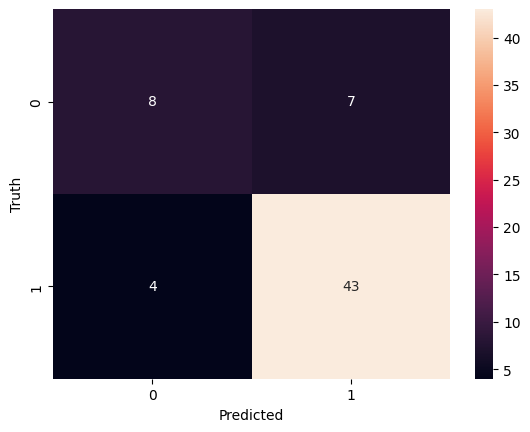

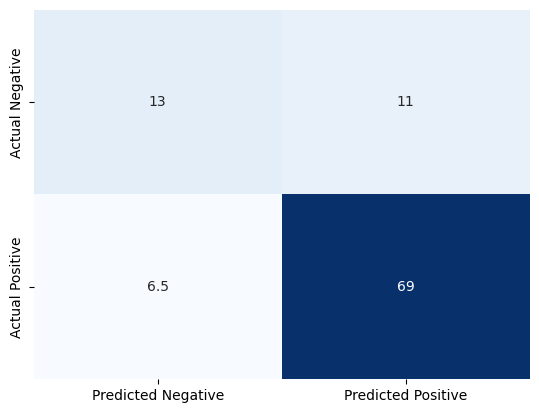

In [ ]:
#RandomForest
rf_classifier1 = RandomForestClassifier(random_state = 0)
rf_classifier1.fit(X_Train, y_train)
print('Train score: ',round(rf_classifier1.score(X_Train, y_train),3)*100)

y_pred = rf_classifier1.predict(x_test)
print('Test score: ',round(accuracy_score(y_test,y_pred),3)*100)
print('precision score: ',round(precision_score(y_test, y_pred),3)*100)
print('F1 score: ',round(f1_score(y_test, y_pred),3)*100)

print('-Confusion Matrix-\n')
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Calculate percentiles
cm_percent = cm / np.sum(cm) * 100
# Create heatmap using seaborn
sns.heatmap(cm_percent, annot=True, cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.show()

Note: a test score of 82.3 in Random Forest is a good result, but the large difference between the train score and test score suggests that the model is overfitting to the training data.

so I will tuning at the hyperparameter

Train score:  85.9
Test score:  87.09677419354838
precision score:  86.79245283018868
F1 score:  92.0
-Confusion Matrix-



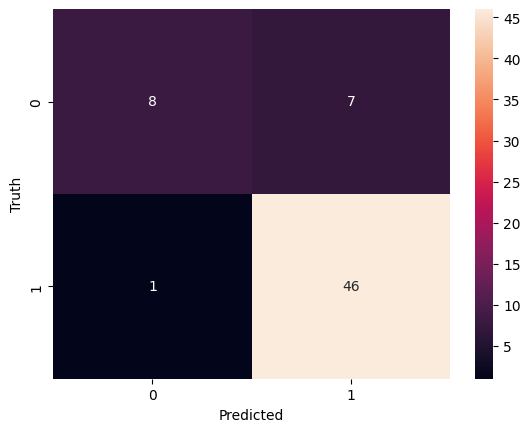

<Axes: >

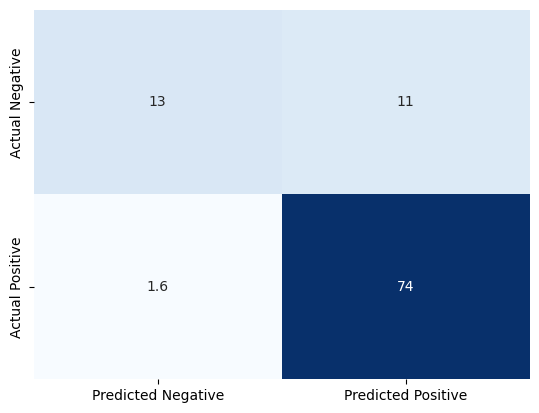

In [ ]:
#RandomForest
rf_classifier2 = RandomForestClassifier( n_estimators=130,max_depth=7,random_state = 0)
rf_classifier2.fit(X_Train, y_train)
print('Train score: ',round(rf_classifier2.score(X_Train, y_train),3)*100)

y_pred = rf_classifier2.predict(x_test)
print('Test score: ',accuracy_score(y_test,y_pred)*100)
print('precision score: ',precision_score(y_test, y_pred)*100)
print('F1 score: ',f1_score(y_test, y_pred)*100)

print('-Confusion Matrix-\n')
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

# Calculate percentiles
cm_percent = cm / np.sum(cm) * 100
# Create heatmap using seaborn
sns.heatmap(cm_percent, annot=True, cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])

**Logistic Regression**

Train score:  80.10000000000001
Test score:  87.09677419354838
Precision score:  86.8
F1 score:  92.0
-Confusion Matrix-



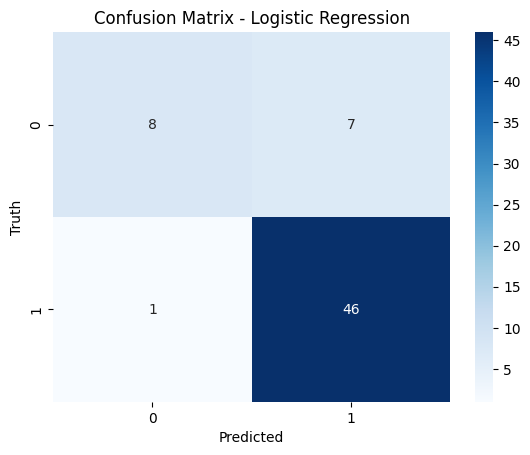

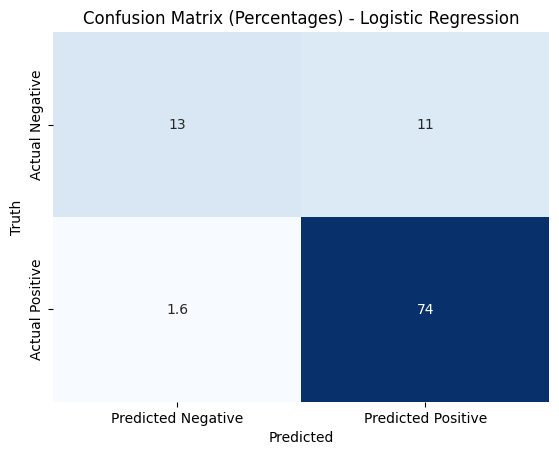

In [ ]:
# Initialize the Logistic Regression model
logistic_model = LogisticRegression(random_state=0)

# Fit the model to the training data
logistic_model.fit(X_Train, y_train)

# Evaluate on training set
train_score = logistic_model.score(X_Train, y_train)
print('Train score: ', round(train_score, 3) * 100)

# Make predictions on the test set
y_pred_logistic = logistic_model.predict(x_test)

# Evaluate the model on the test set
test_score = accuracy_score(y_test, y_pred_logistic)
precision = precision_score(y_test, y_pred_logistic)
f1 = f1_score(y_test, y_pred_logistic)

print('Test score: ', test_score*100)
print('Precision score: ', round(precision, 3) * 100)
print('F1 score: ', round(f1, 3) * 100)

# Confusion Matrix
print('-Confusion Matrix-\n')
cm_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(cm_logistic, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Percentile Confusion Matrix
cm_percent_logistic = cm_logistic / np.sum(cm_logistic) * 100
sns.heatmap(cm_percent_logistic, annot=True, cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix (Percentages) - Logistic Regression')
plt.show()

**SVM**

Train score:  80.10000000000001
Test score:  87.09677419354838
Precision score:  86.8
F1 score:  92.0
-Confusion Matrix-



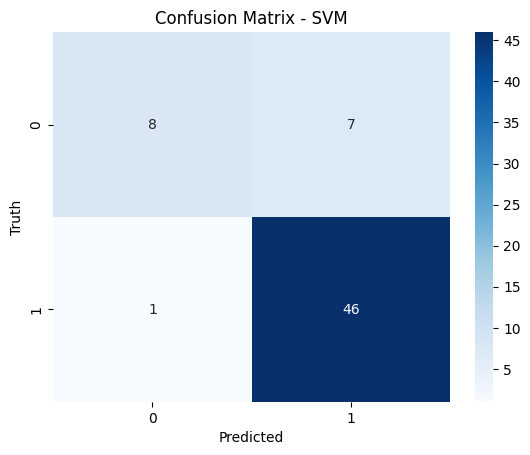

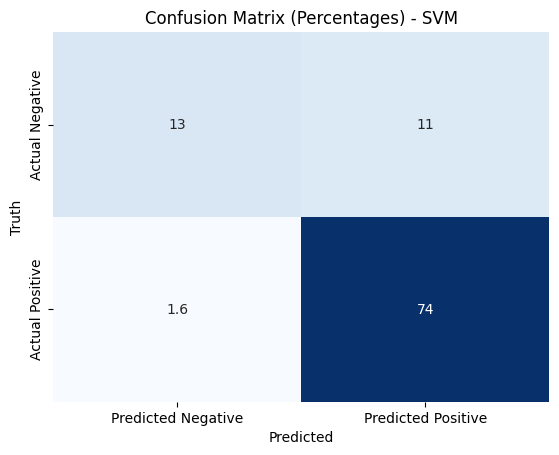

In [ ]:
# Initialize the SVM model
svm_model1 = SVC(kernel='linear', random_state=0)

# Fit the model to the training data
svm_model1.fit(X_Train, y_train)

# Evaluate on training set
train_score = svm_model1.score(X_Train, y_train)
print('Train score: ', round(train_score, 3) * 100)

# Make predictions on the test set
y_pred_svm = svm_model1.predict(x_test)

# Evaluate the model on the test set
test_score = accuracy_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
f1 = f1_score(y_test, y_pred_svm)

print('Test score: ', test_score* 100)
print('Precision score: ', round(precision, 3) * 100)
print('F1 score: ', round(f1, 3) * 100)

# Confusion Matrix
print('-Confusion Matrix-\n')
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - SVM')
plt.show()

# Percentile Confusion Matrix
cm_percent_svm = cm_svm / np.sum(cm_svm) * 100
sns.heatmap(cm_percent_svm, annot=True, cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix (Percentages) - SVM')
plt.show()


After tuning at the hyperparameter SVM

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Best SVM Parameters: {'C': 0.01, 'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'probability': True}
Train Accuracy: 80.0725%
Test Accuracy: 87.0968%
Precision Score: 86.79%
F1 Score: 92.00%
- Confusion Matrix -


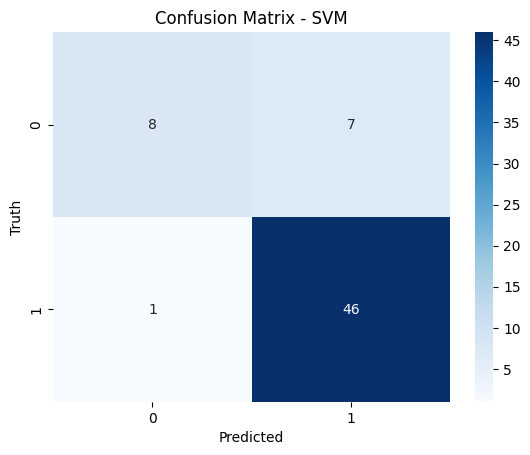

In [ ]:
# Define the parameter grid for SVM
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Different kernel types
    'degree': [2, 3, 4],  # Degree for 'poly' kernel
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'class_weight': [None, 'balanced'],  # Handling imbalanced data
    'probability': [True]  # Enables probability estimates
}

# Initialize SVM
svm_model = SVC(random_state=0,probability=True)

# Perform grid search with cross-validation
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1)
grid_search_svm.fit(X_Train, y_train)  # Preprocessed training data

# Extract the best model and parameters
best_svm = grid_search_svm.best_estimator_
best_params_svm = grid_search_svm.best_params_
print(f"Best SVM Parameters: {best_params_svm}")

# Train accuracy
train_score_svm = best_svm.score(X_Train, y_train)
print(f"Train Accuracy: {train_score_svm * 100:.4f}%")

# Predictions on the test set
y_pred_svm = best_svm.predict(x_test)

# Evaluate the model
test_accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print(f"Test Accuracy: {test_accuracy_svm * 100:.4f}%")
print(f"Precision Score: {precision_svm * 100:.2f}%")
print(f"F1 Score: {f1_svm * 100:.2f}%")

# Confusion Matrix
print("- Confusion Matrix -")
cm_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - SVM')
plt.show()


**XGBoost**

Train score:  94.0
Test score:  83.89999999999999
Precision score:  87.8
F1 score:  89.60000000000001
-Confusion Matrix-



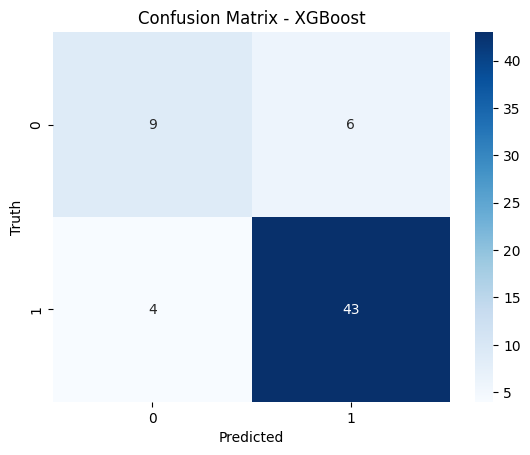

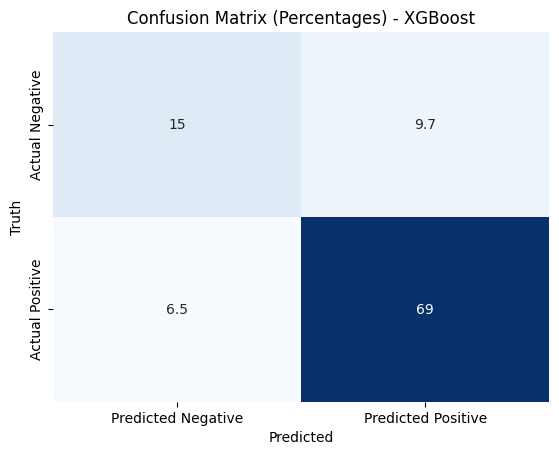

In [ ]:
# Initialize the XGBoost model
xgb_model = xgb.XGBClassifier(
    n_estimators=100,         # Number of trees
    max_depth=6,              # Maximum depth of trees
    learning_rate=0.1,        # Learning rate (eta)
    random_state=0            # For reproducibility
)

# Fit the model to the training data
xgb_model.fit(X_Train, y_train)

# Evaluate on training set
train_score = xgb_model.score(X_Train, y_train)
print('Train score: ', round(train_score, 3) * 100)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(x_test)

# Evaluate the model on the test set
test_score = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print('Test score: ', round(test_score, 3) * 100)
print('Precision score: ', round(precision, 3) * 100)
print('F1 score: ', round(f1, 3) * 100)

# Confusion Matrix
print('-Confusion Matrix-\n')
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix - XGBoost')
plt.show()

# Percentile Confusion Matrix
cm_percent_xgb = cm_xgb / np.sum(cm_xgb) * 100
sns.heatmap(cm_percent_xgb, annot=True, cmap="Blues", cbar=False,
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix (Percentages) - XGBoost')
plt.show()


**Emsemble Method (Voting Classifier)**

In [ ]:
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_classifier2),          # Random Forest
        ('svm', svm_model),              # SVM
        ('log_reg', logistic_model)      # Logistic Regression
    ],
    voting='soft'  # Soft voting (using predicted probabilities)
)

In [ ]:
# Train the voting classifier
voting_clf.fit(X_Train, y_train)

# Predictions on the test set
y_test_pred = voting_clf.predict(x_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_test_pred)*100
print("Voting Classifier Accuracy on Test Data:", accuracy)

Voting Classifier Accuracy on Test Data: 87.09677419354838


**Best Evaluation Model**: Ensemble Method (Voting Classifier)

**Justifications**:

 Because of interpretability and transparency, loan approval systems need to be clear and trustworthy for compliance. Models like Logistic Regression and Random Forest provide easy-to-understand outputs, such as feature importance. The Voting Classifier can still show which models influenced the final decision, making it easier to understand how predictions are made. While it's more complex, it still allows for tracking the impact of each model, which is important for transparency.